In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, roc_curve, auc
import matplotlib.pyplot as plt


In [3]:
loan_data = pd.read_csv("/Users/mh/Downloads/Odd Roll Numbers 2/loangrant - loangrant.csv")

/var/folders/3z/gjs8159j4pj4fhckh__lk6g00000gn/T/ipykernel_57931/3921814809.py:1: DtypeWarning: Columns (10,16) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv("/Users/mh/Downloads/Odd Roll Numbers 2/loangrant - loangrant.csv")


In [4]:

# Replace non-numeric values with NaNs
loan_data = loan_data.replace('#VALUE!', np.nan)

# Dropping rows with NaNs
loan_data.dropna(inplace=True)


In [5]:
# Removing duplicate instances
loan_data.drop_duplicates(inplace=True)

# Remove non-numeric characters from 'Monthly Debt' column
loan_data['Monthly Debt'] = loan_data['Monthly Debt'].replace('[\$,]', '', regex=True).astype(float)

# Label Encoding for categorical column 'Term'
label_encoder = LabelEncoder()
loan_data['Term'] = label_encoder.fit_transform(loan_data['Term'])

# Label Encoding for categorical column 'Years in current job'
loan_data['Years in current job'] = loan_data['Years in current job'].replace({'< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3,
                                                                '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7,
                                                                '8 years': 8, '9 years': 9, '10+ years': 10})


/var/folders/3z/gjs8159j4pj4fhckh__lk6g00000gn/T/ipykernel_57931/4078410670.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_data['Years in current job'] = loan_data['Years in current job'].replace({'< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3,


In [6]:

# Label Encoding for categorical column 'Purpose'
loan_data['Purpose'] = label_encoder.fit_transform(loan_data['Purpose'])

# One-hot encoding for categorical column 'Home Ownership'
loan_data = pd.get_dummies(loan_data, columns=['Home Ownership'], drop_first=True)


In [7]:

# Splitting dataset into features and target variable
X = loan_data.drop(['Loan Status', 'Loan ID', 'Customer ID'], axis=1)
y = loan_data['Loan Status']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


num_trees = [50, 100, 150, 200]

# Initializing lists to store results
conf_matrices = []
accuracies = []
recalls = []
precisions = []
roc_aucs = []


In [9]:

for trees in num_trees:
    # Training the Random Forest model
    rf_classifier = RandomForestClassifier(n_estimators=trees, random_state=42)
    rf_classifier.fit(X_train, y_train)

    # Predicting the Test set probabilities
    y_pred_prob = rf_classifier.predict_proba(X_test)[:, 1]  # Probability of being 'Charged Off'

    # Predicting the Test set results
    y_pred = rf_classifier.predict(X_test)

    # Confusion Matrix
    conf_matrices.append(confusion_matrix(y_test, y_pred))

    # Accuracy
    accuracies.append(accuracy_score(y_test, y_pred))

    # Recall
    recalls.append(recall_score(y_test, y_pred, pos_label='Charged Off'))

    # Precision
    precisions.append(precision_score(y_test, y_pred, pos_label='Charged Off'))

    # ROC and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob, pos_label='Charged Off')
    roc_aucs.append(auc(fpr, tpr))


In [10]:

# Reporting results
for i, trees in enumerate(num_trees):
    print(f"Results for {trees} trees:")
    print("Confusion Matrix:")
    print(conf_matrices[i])
    print("Accuracy:", accuracies[i])
    print("Recall:", recalls[i])
    print("Precision:", precisions[i])
    print("ROC AUC:", roc_aucs[i])
    print("\n")


Results for 50 trees:
Confusion Matrix:
[[ 481 1137]
 [  54 5821]]
Accuracy: 0.8410516482049913
Recall: 0.2972805933250927
Precision: 0.8990654205607477
ROC AUC: 0.17733256187044685


Results for 100 trees:
Confusion Matrix:
[[ 469 1149]
 [  41 5834]]
Accuracy: 0.8411851060990257
Recall: 0.28986402966625463
Precision: 0.9196078431372549
ROC AUC: 0.17163316939746998


Results for 150 trees:
Confusion Matrix:
[[ 469 1149]
 [  31 5844]]
Accuracy: 0.84251968503937
Recall: 0.28986402966625463
Precision: 0.938
ROC AUC: 0.1687090445256818


Results for 200 trees:
Confusion Matrix:
[[ 475 1143]
 [  28 5847]]
Accuracy: 0.84372080608568
Recall: 0.29357231149567364
Precision: 0.9443339960238568
ROC AUC: 0.16768245535596876




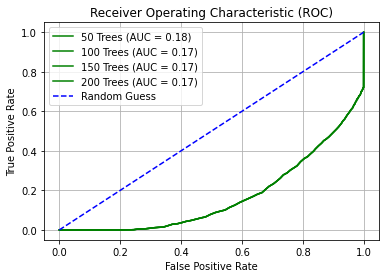

In [ ]:
for i, trees in enumerate(num_trees):
    fpr, tpr, _ = roc_curve(y_test, rf_classifier.predict_proba(X_test)[:,1], pos_label='Charged Off')
    plt.plot(fpr, tpr, label=f'{trees} Trees (AUC = {roc_aucs[i]:.2f})', color='green')

plt.plot([0, 1], [0, 1], linestyle='--', color='blue', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()
plt.grid(True)
plt.show()